好用工具：

* https://stackoverflow.com/questions/34702815/pandas-group-by-and-pivot-table-difference

注意事項：
* 如果畫圖出現中文亂碼：https://blog.csdn.net/fwj_ntu/article/details/105598145

# 套件

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns 
import matplotlib.pyplot as plt
# plt.rcParams['font.sans-serif'] = 'SimHei'
from scipy import stats

In [2]:
occupation_dict = {
    1: "營造／礦砂業",
    2: "製造業",
    3: "水電燃氣業",
    4: "批發／零售／貿易商",
    5: "旅宿／餐飲",
    6: "運輸倉儲",
    7: "農／林／漁／牧",
    8: "金融保險",
    9: "不動產／租賃",
    10: "軍／警／消",
    11: "公務人員",
    12: "律師／會計師／地政士",
    13: "醫藥服務",
    14: "休閒服務",
    15: "其他／家管",
    16: "自由業",
    17: "投資／自營商",
    18: "媒體文教",
    19: "學生",
    20: "學校教師（含行政人員）",
    21: "資訊科技",
    22: "公證人或記帳士",
    23: "國防工業",
    24: "投資或稅務顧問公司",
    25: "不動產仲介／代銷商",
    26: "大宗物資貿易商",
    27: "博弈業（網路／實體）",
    28: "八大特種行業",
    29: "宗教、慈善、基金會",
    30: "銀樓、珠寶商",
    31: "藝術品或古董買賣商",
    32: "當鋪",
    33: "實體或虛擬貨幣兌換所"
}

# 資料預處理

In [13]:
# 選擇你要的欄位
selected_columns = [
    
    # yes/no
    'sex',
    'isReject',
    'hasOtherComAccount',

    # categorical
    # 'bid',
    'source',
    'occupation',
    'company',
    'eduLevel',

    # numerical-like
    'expInvestment', 
    'yrsInvestment', 
    'frqInvestment',
    'srcCapital',
    'quotaCredit',
    'incomeYear',
    'totalWealth',
    
    'quota_origin',
    'quota_now'
]


data = pd.read_csv('./data/data.csv') # 載入資料
data = data[selected_columns] # 選擇欄位
data = data.dropna() # 移除空值列

# ---------------------------------------------------------------------------- #

data = data[data['quota_now']>0]
# data = data[data['quota_now']<=0.6e6]
data = data[data['quota_now']<=1e6]
# data = data[data['quota_now']==1000000]
# data = data[data['quota_now']<0.2e6]
# data = data[data['quota_now']<=0.7e6]

# data = data[data['source']=='FUGLE']

data = data[data['isReject']==0]
data = data.drop('isReject', axis=1)

# data = data[data['quota_origin']==100000]

# data = data[data['occupation']==19]
# data = data.drop('source', axis=1)

# ---------------------------------------------------------------------------- #

data['quota_origin'] /= 1e4 # 單位縮放
data['quota_now'] /= 1e4 # 單位縮放
# data = data[(np.abs(stats.zscore(data['quota_now'].values)) < 2)] # 移除outlier

In [14]:
data['occupation'] = data['occupation'].map(occupation_dict)

In [15]:
data.head()

,sex,hasOtherComAccount,source,occupation,company,eduLevel,expInvestment,yrsInvestment,frqInvestment,srcCapital,quotaCredit,incomeYear,totalWealth,quota_origin,quota_now
0,1,0,FUGLE,資訊科技,華誠資訊有限公司,2,0,3,2,0,0,1,1,100.0,50.0
1,1,1,FUGLE,媒體文教,臺視電視台,0,4,3,0,0,0,1,1,100.0,100.0
3,1,1,FUGLE,製造業,台灣先藝,0,4,3,3,0,0,2,2,100.0,100.0
4,1,1,FUGLE,製造業,廣積科技股份有限公司,0,3,1,0,0,1,1,1,100.0,100.0
5,1,1,玉證,資訊科技,SGS,0,0,3,2,0,0,1,0,50.0,100.0


In [16]:
# quick look at our data types & null counts 
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 127496 entries, 0 to 131353
Data columns (total 15 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   sex                 127496 non-null  int64  
 1   hasOtherComAccount  127496 non-null  int64  
 2   source              127496 non-null  object 
 3   occupation          127492 non-null  object 
 4   company             127496 non-null  object 
 5   eduLevel            127496 non-null  int64  
 6   expInvestment       127496 non-null  int64  
 7   yrsInvestment       127496 non-null  int64  
 8   frqInvestment       127496 non-null  int64  
 9   srcCapital          127496 non-null  int64  
 10  quotaCredit         127496 non-null  int64  
 11  incomeYear          127496 non-null  int64  
 12  totalWealth         127496 non-null  int64  
 13  quota_origin        127496 non-null  float64
 14  quota_now           127496 non-null  float64
dtypes: float64(2), int64(10), object(3

In [17]:
# 查看numerical data的分佈
data.describe()

,sex,hasOtherComAccount,eduLevel,expInvestment,yrsInvestment,frqInvestment,srcCapital,quotaCredit,incomeYear,totalWealth,quota_origin,quota_now
count,127496.000000,127496.000000,127496.000000,127496.000000,127496.000000,127496.000000,127496.000000,127496.000000,127496.000000,127496.000000,127496.000000,127496.000000
mean,1.510385,0.391879,0.784934,0.830167,2.240478,1.431072,0.040017,0.111054,0.617604,0.577124,59.812010,61.495655
std,0.499894,0.488172,1.151379,1.355641,0.804362,1.648795,0.285468,0.350677,0.682309,0.673486,40.974045,40.098172
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,1.000000,0.000000,0.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,10.000000,19.000000
50%,2.000000,0.000000,0.000000,0.000000,2.000000,0.000000,0.000000,0.000000,1.000000,0.000000,60.000000,75.000000
75%,2.000000,1.000000,1.000000,1.000000,3.000000,3.000000,0.000000,0.000000,1.000000,1.000000,100.000000,100.000000
max,2.000000,1.000000,7.000000,4.000000,3.000000,5.000000,3.000000,4.000000,2.000000,2.000000,100.000000,100.000000


# 分析data

## 各欄位分佈

<ipython-input-18-339c625775cf>:2: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared
  data.hist(ax=ax, bins=20)


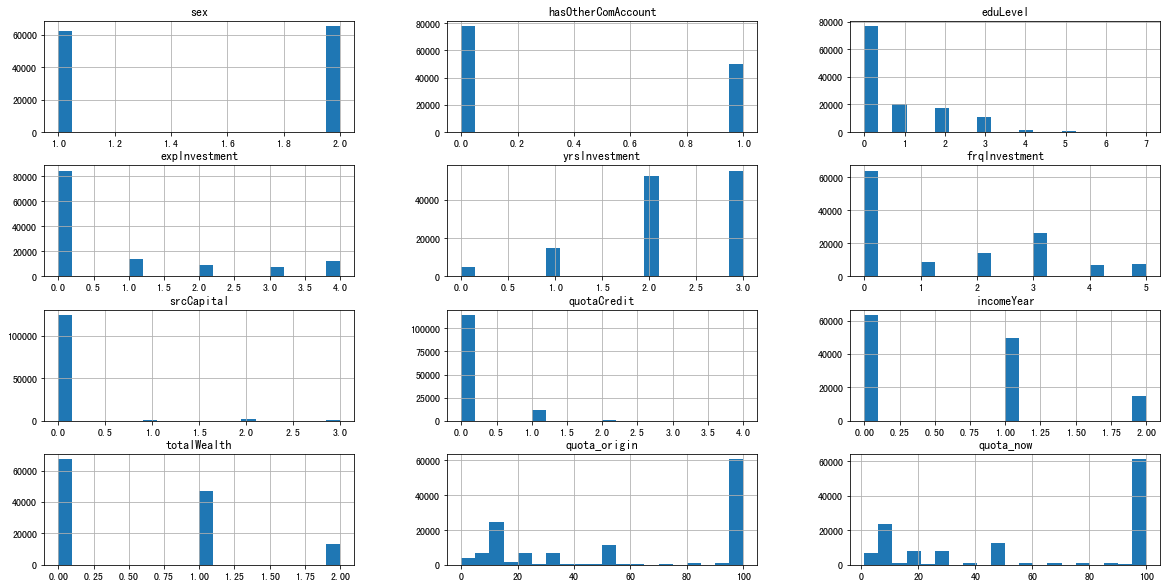

In [18]:
fig, ax = plt.subplots(figsize=(20, 10))
data.hist(ax=ax, bins=20)
plt.show()
plt.close()

## 產業 v.s. 開戶

In [20]:
pd.pivot_table(data=data, index="occupation", columns="source", values="quota_now", aggfunc=['count', 'mean', 'std'])

count                         mean                        \
source       Anue   FUGLE       玉證        Anue      FUGLE         玉證   
occupation                                                             
不動產仲介／代銷商     1.0   127.0    210.0   50.000000  95.275591  52.528571   
不動產／租賃        NaN   401.0    628.0         NaN  96.820449  49.208599   
休閒服務          4.0  2321.0   2803.0   49.500000  96.320121  35.724224   
八大特種行業        NaN    34.0     59.0         NaN  89.382353  25.203390   
公務人員          1.0  2797.0   2434.0   10.000000  96.764748  46.359080   
公證人或記帳士       NaN    63.0     82.0         NaN  88.190476  39.353659   
其他／家管         7.0  6060.0   7333.0   61.142857  48.882343  40.865676   
博弈業（網路／實體）    NaN    27.0     48.0         NaN  72.962963  30.437500   
國防工業          NaN    61.0     51.0         NaN  94.016393  33.411765   
大宗物資貿易商       NaN    30.0     27.0         NaN  90.000000  51.111111   
媒體文教          1.0  1683.0   1338.0  100.000000  96.729055  43.572496   
學校教師（含行政人員）   5.0  2611.0   2884.0   52.800000  96.624282  46.016297   
學生            4.0  5601.0   4429.0    6.000000  25.068559  23.925943   
宗教、慈善、基金會     NaN   375.0    325.0         NaN  85.909333  38.963077   
實體或虛擬貨幣兌換所    NaN     7.0     10.0         NaN  74.285714  30.900000   
律師／會計師／地政士    1.0   535.0    453.0  100.000000  94.084112  47.626932   
批發／零售／貿易商    13.0  5644.0   6904.0   53.769231  96.478207  42.938297   
投資或稅務顧問公司     NaN    78.0     61.0         NaN  93.538462  56.508197   
投資／自營商        1.0   384.0    538.0   10.000000  91.083333  53.546468   
旅宿／餐飲         1.0  3222.0   4049.0  100.000000  95.940099  33.598666   
水電燃氣業         NaN   470.0    541.0         NaN  96.268085  38.896488   
營造／礦砂業        2.0  1571.0   1829.0   27.500000  95.981540  41.440678   
當鋪            NaN     4.0     11.0         NaN  95.000000  28.909091   
自由業           7.0  1214.0   2422.0   56.000000  60.749588  39.447977   
藝術品或古董買賣商     1.0    23.0     28.0    9.000000  81.782609  40.571429   
製造業           7.0  9210.0  11395.0   33.285714  96.297394  39.886792   
資訊科技          8.0  6855.0   4585.0   54.875000  96.682567  47.168811   
軍／警／消         3.0  1578.0   1739.0   70.000000  95.449303  37.457159   
農／林／漁／牧       NaN   294.0    432.0         NaN  95.397959  50.453704   
運輸倉儲          1.0  1396.0   1690.0   30.000000  95.996418  37.867456   
醫藥服務          2.0  4309.0   4744.0   54.500000  96.156649  44.912521   
金融保險          5.0  1944.0   2336.0   56.000000  96.234053  48.424229   
銀樓、珠寶商        NaN    22.0     48.0         NaN  90.681818  43.875000   

                   std                        
source            Anue      FUGLE         玉證  
occupation                                    
不動產仲介／代銷商          NaN  18.347474  36.276208  
不動產／租賃             NaN  13.739275  35.567033  
休閒服務         37.863791  14.765161  32.558660  
八大特種行業             NaN  26.837349  23.100067  
公務人員               NaN  12.963871  34.905581  
公證人或記帳士            NaN  29.735315  34.983372  
其他／家管        47.841504  42.851546  34.328205  
博弈業（網路／實體）         NaN  40.174122  29.294474  
國防工業               NaN  20.017069  29.977442  
大宗物資貿易商            NaN  26.652295  36.083592  
媒體文教               NaN  13.362513  35.260856  
學校教師（含行政人員）  43.837199  14.363993  36.028336  
學生            4.690416  32.116206  28.931872  
宗教、慈善、基金會          NaN  30.965692  34.065820  
實體或虛擬貨幣兌換所         NaN  43.915503  22.442272  
律師／會計師／地政士         NaN  20.414030  37.082483  
批發／零售／貿易商    44.784956  14.153261  35.761673  
投資或稅務顧問公司          NaN  21.341194  37.255703  
投資／自營商             NaN  24.619577  35.767752  
旅宿／餐飲              NaN  15.600307  32.102436  
水電燃氣業              NaN  14.628463  32.463033  
營造／礦砂業       31.819805  14.905444  33.723866  
當鋪                 NaN  10.000000  12.283766  
自由業          43.497126  43.296785  34.049912  
藝術品或古董買賣商          NaN  36.286682  30.899393  
製造業          31.705490  14.102823  33.639421  
資訊科技         40.197503  13.202687  35.922496  
軍／警／消    

## 相關性分析

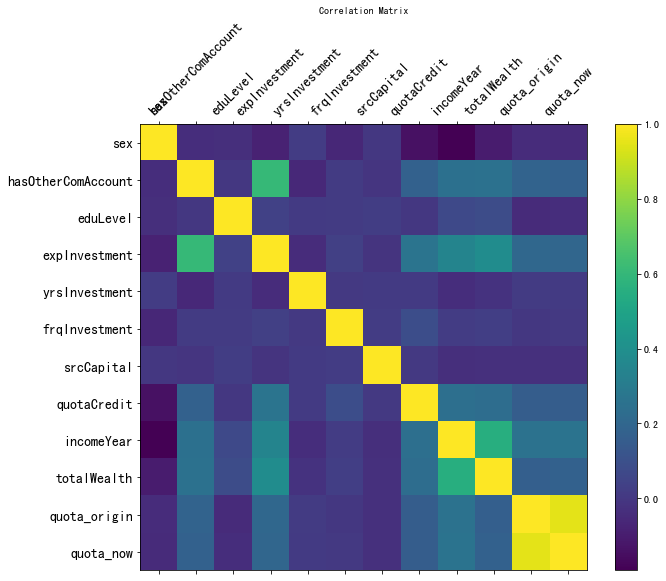

In [21]:
# pearson coefficient
corr = data.corr('pearson')
f = plt.figure(figsize=(10, 8))
plt.matshow(data.corr(), fignum=f.number)
plt.xticks(range(data.select_dtypes(['number']).shape[1]), data.select_dtypes(['number']).columns, fontsize=14, rotation=45)
plt.yticks(range(data.select_dtypes(['number']).shape[1]), data.select_dtypes(['number']).columns, fontsize=14)
cb = plt.colorbar()
cb.ax.tick_params(labelsize=10)
plt.title('Correlation Matrix', fontsize=10)
plt.show()
plt.close()

# sns.heatmap(data.corr())
# plt.show()

## 各欄位 v.s. quota_now

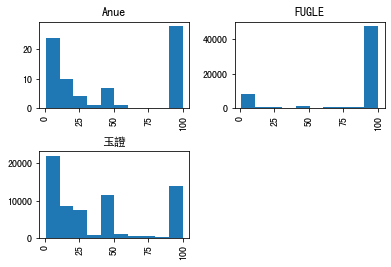

In [22]:
data.hist(column='quota_now', by='source')
plt.show()
plt.close()

/home/jack/miniconda3/envs/ml/lib/python3.9/site-packages/pandas/plotting/_matplotlib/hist.py:396: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared
  axes = _grouped_hist(


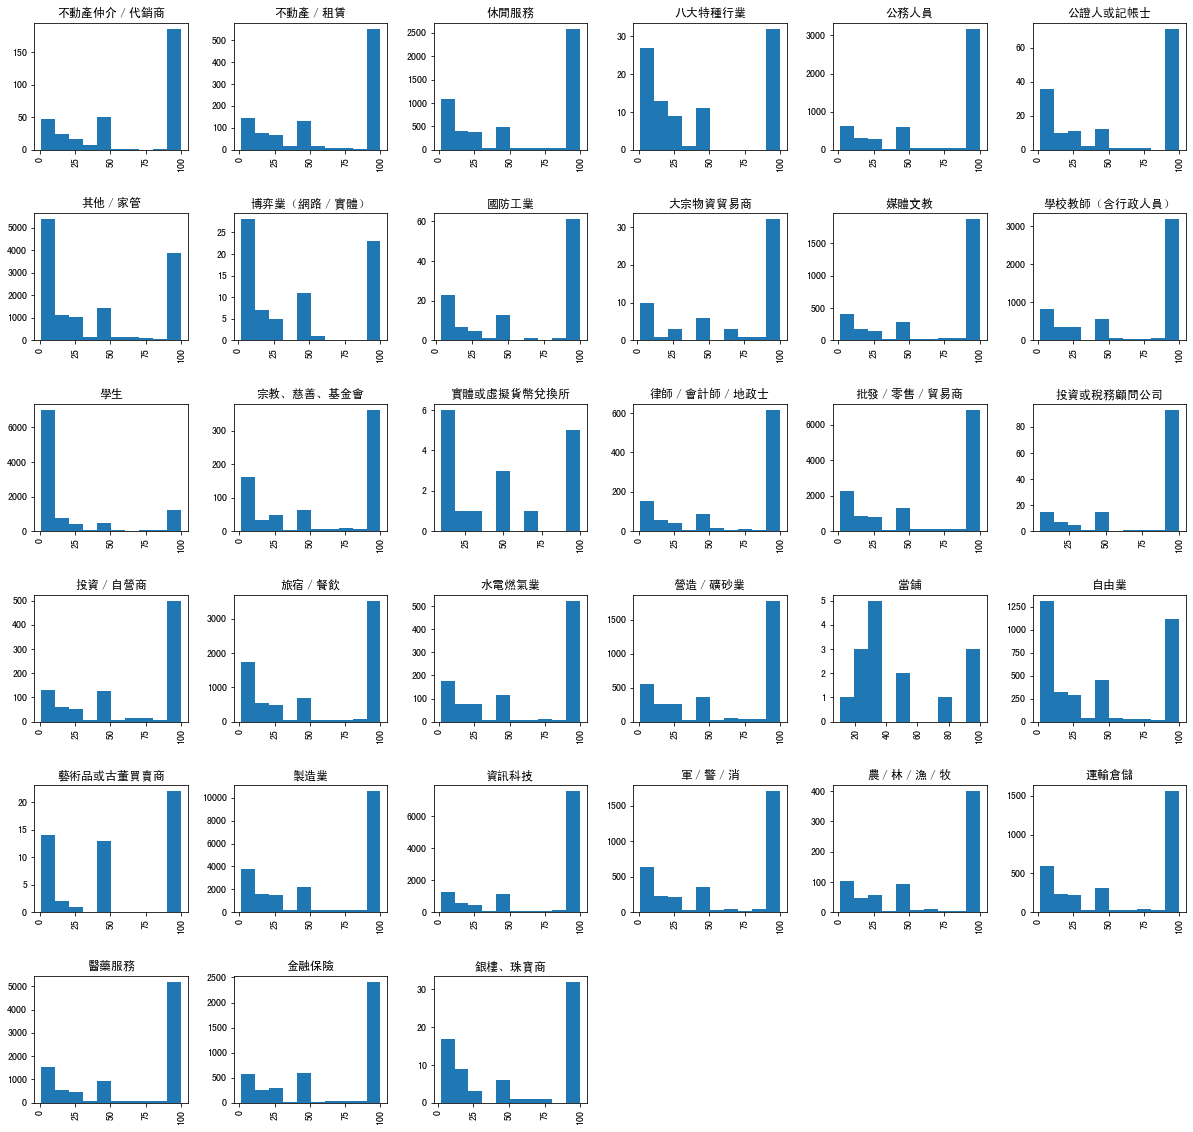

In [23]:
fig, ax = plt.subplots(figsize=(20, 20))
data.hist(column='quota_now', by='occupation', ax=ax)
plt.show()
plt.close()

# 分析credit

In [41]:
names = [
    '身分證號',
    '分公司代碼',
    '違約',
    '普通戶開戶數',
    '信用戶開戶數',
    '疑似洗錢註記',
    '融資總餘額-萬元',
    '融券總餘額-萬元',
    '單日買賣最高額度-萬',
    '期貨市場開戶數',
    '借貸款項契約數',
    '現股當沖開戶數']
credit = pd.read_csv('./data/credit.csv', names=names, skiprows=1)
# credit = pd.read_csv('./data/credit.csv')
credit

,,身分證號,分公司代碼,違約,普通戶開戶數,信用戶開戶數,疑似洗錢註記,融資總餘額-萬元,融券總餘額-萬元,單日買賣最高額度-萬,期貨市場開戶數,借貸款項契約數,現股當沖開戶數
140289368C,884AZ,2021-12-14,20211214,N,1,0,0,0,0,N,0,0,0
190354142C,884Z,2022-01-18,20220118,N,0,0,0,0,0,N,0,0,0
170393481C,884Y,2021-12-03,20211203,N,1,0,0,0,200,N,0,1,1
170431289C,884W,2021-09-09,20210909,N,0,0,0,0,0,N,0,0,0
142005435C,884AZ,2022-01-20,20220120,N,0,0,0,0,0,N,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
202050304A,884X,2021-09-02,20210902,N,1,0,0,0,300,N,0,0,0
242050504A,884AZ,2021-04-21,20210420,N,3,0,0,0,1048,N,0,0,1
160003957A,884AZ,2021-06-08,20210607,N,1,0,0,0,100,N,0,0,1
120015869A,884AZ,2021-04-09,20210408,N,0,0,0,0,0,N,0,0,0


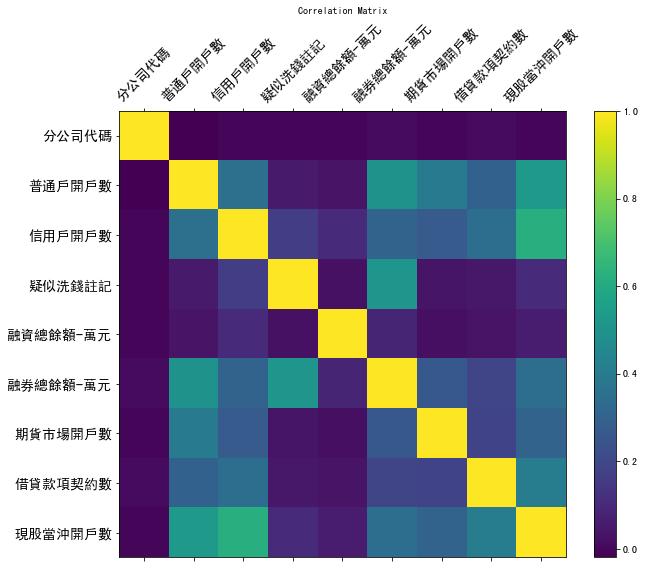

In [42]:
# pearson coefficient
corr = credit.corr('pearson')
f = plt.figure(figsize=(10, 8))
plt.matshow(credit.corr(), fignum=f.number)
plt.xticks(range(credit.select_dtypes(['number']).shape[1]), credit.select_dtypes(['number']).columns, fontsize=14, rotation=45)
plt.yticks(range(credit.select_dtypes(['number']).shape[1]), credit.select_dtypes(['number']).columns, fontsize=14)
cb = plt.colorbar()
cb.ax.tick_params(labelsize=10)
plt.title('Correlation Matrix', fontsize=10)
plt.show()
plt.close()

# sns.heatmap(data.corr())
# plt.show()

#  資料預處理

In [16]:
def round_to_five(x):
    y = x/5 - x // 5
    if y >= 0.5:
        return (x // 5)*5 + 5
    else:
        return (x // 5)*5

In [17]:
# data['quota_now'] = data['quota_now'].apply(round_to_five)

In [18]:
X = data.iloc[:, :-1].values
Y = data.iloc[:, -1].values

In [ ]:
# split the dataset into train and test sets
from sklearn.model_selection import train_test_split
X_train, X_valid, Y_train, Y_valid = train_test_split(X, Y, test_size=0.33)

# Linear Regression

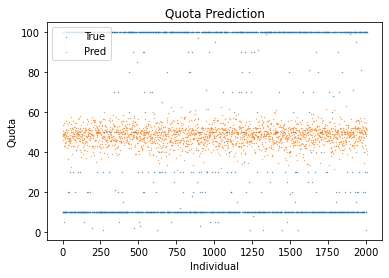

In [ ]:
# linear regression
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_train, Y_train)
Y_pred = model.predict(X_valid)
plt.scatter(range(len(Y_pred)), Y_valid, s=0.1, label='True')
plt.scatter(range(len(Y_pred)), Y_pred, s=0.1, label='Pred')
plt.title('Quota Prediction')
plt.xlabel('Individual')
plt.ylabel('Quota')
plt.legend()
plt.show()

# Random Foreset

In [ ]:
from sklearn.ensemble import RandomForestRegressor
model = RandomForestRegressor()
model.fit(X_train, Y_train)

RandomForestRegressor()

In [ ]:
Y_pred = model.predict(X_valid).astype(int)

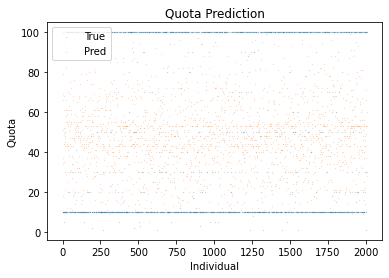

In [ ]:
plt.scatter(range(len(Y_pred)), Y_valid, s=0.01, label='True')
plt.scatter(range(len(Y_pred)), Y_pred, s=0.01, label='Pred')
plt.title('Quota Prediction')
plt.xlabel('Individual')
plt.ylabel('Quota')
plt.legend()
plt.show()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


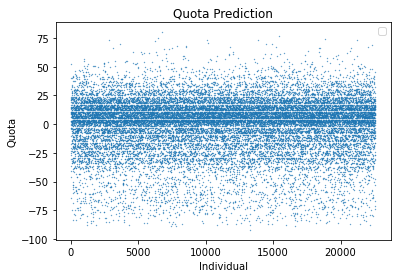

In [ ]:
Y_diff = Y_pred - Y_valid
plt.scatter(range(len(Y_diff)), Y_diff, s=0.1)
plt.title('Quota Prediction')
plt.xlabel('Individual')
plt.ylabel('Quota')
plt.legend()
plt.show()

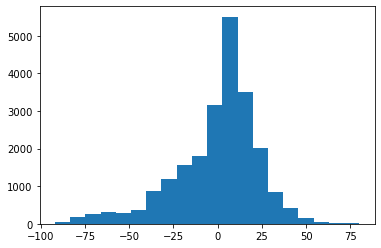

In [ ]:
plt.hist(Y_diff, bins=20)
plt.show()